In [194]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.neighbors import KNeighborsClassifier

C:\Users\night\AppData\Local\Temp\ipykernel_2200\642696543.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Constants
_RANDOM_STATE = 42

In [197]:
iris = load_iris()
data = iris.data
target = iris.target
feature_names = iris.feature_names

# Create a DataFrame
df = pd.DataFrame(data, columns=feature_names)
df['Target'] = target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [198]:
# Display the first few rows of the dataset
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [199]:
# Check for missing values
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Target               0
dtype: int64

In [200]:
# Display basic statistics
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


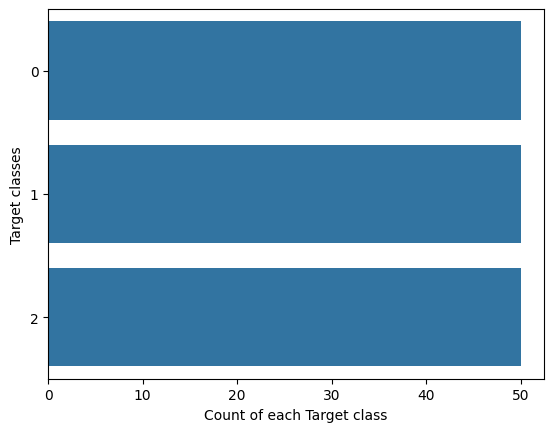

In [201]:
# plot the count of each value in df
sns.countplot(y=df.Target ,data=df)
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

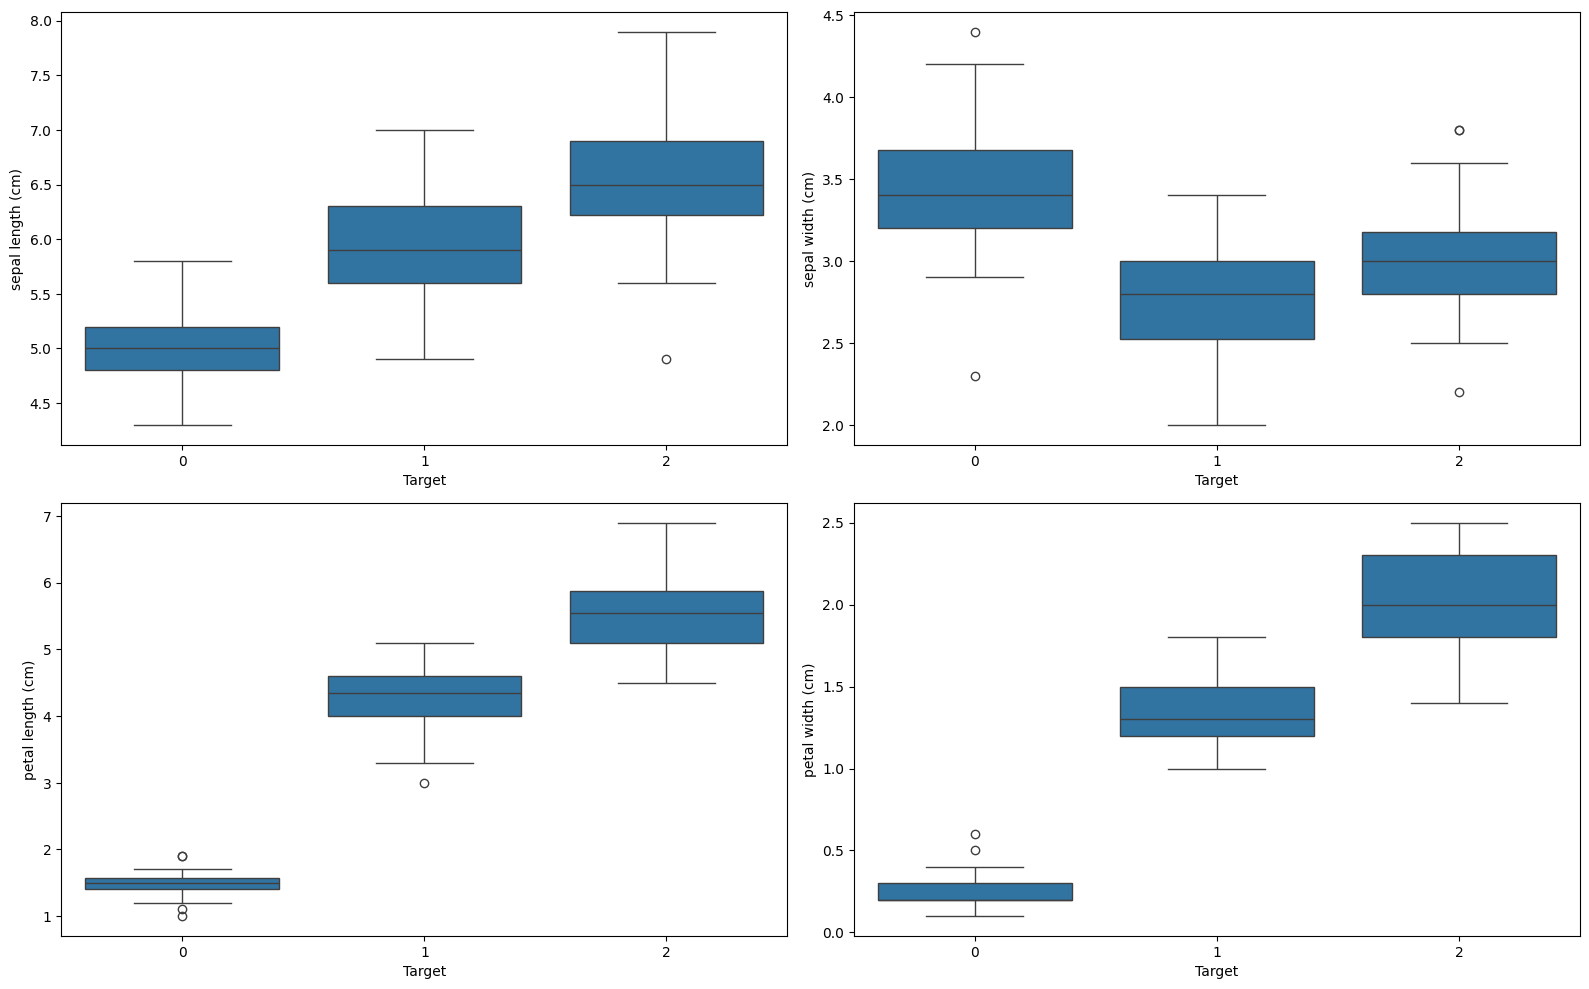

In [202]:
# plot a box plot for each column (Y-axis) - target (X-axis)
# you can choose to create 4 subplots or have four separate plots
fig,ax = plt.subplots(nrows = 2, ncols=2, figsize=(16,10))
row = 0
col = 0
for i in range(len(df.columns) -1):
    if col > 1:
        row += 1
        col = 0
    axes = ax[row,col]
    sns.boxplot(x = df['Target'], y = df[df.columns[i]],ax = axes)
    col += 1
plt.tight_layout()
# plt.title("Individual Features by Class")
plt.show()

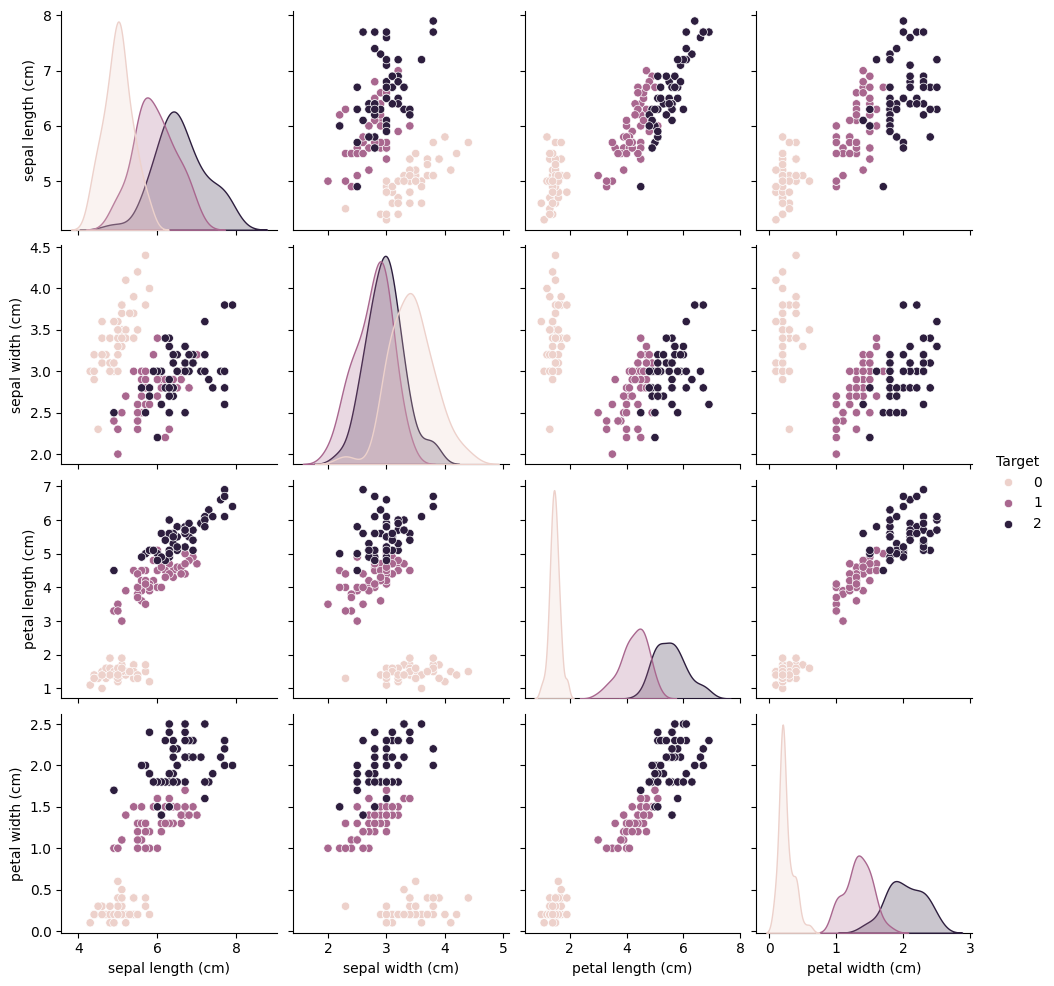

In [203]:
# create a pair plot and define the color as the target
p=sns.pairplot(df, hue = 'Target')

In [204]:
# scale the features
scaler = StandardScaler()
# usually wanna split the data first before scaling
scaled_data = scaler.fit_transform(df.iloc[:, :-1])

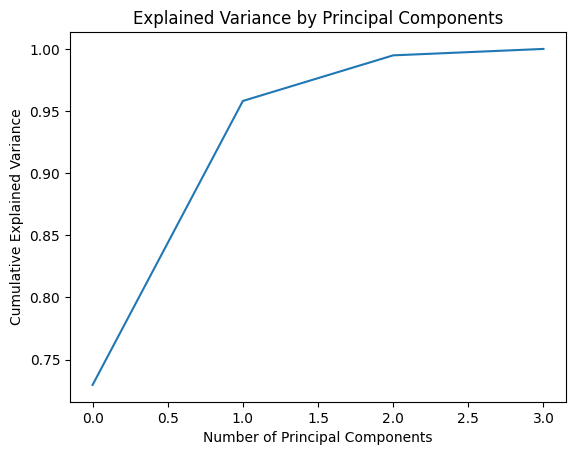

In [205]:
# Instantiate the PCA model
pca = PCA()

# Fit the model to the scaled data
pca_result = pca.fit_transform(scaled_data)

# Calculate the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the explained variance ratio
plt.plot(np.cumsum(explained_variance_ratio))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.show()

In [206]:
# Create a DataFrame with principal components
pca_df = pd.DataFrame(data=pca_result, columns=[f'PC{i}' for i in range(1, len(feature_names)+1)])
pca_df

,PC1,PC2,PC3,PC4
0,-2.264703,0.480027,-0.127706,-0.024168
1,-2.080961,-0.674134,-0.234609,-0.103007
2,-2.364229,-0.341908,0.044201,-0.028377
3,-2.299384,-0.597395,0.091290,0.065956
4,-2.389842,0.646835,0.015738,0.035923
...,...,...,...,...
145,1.870503,0.386966,0.256274,-0.389257
146,1.564580,-0.896687,-0.026371,-0.220192
147,1.521170,0.269069,0.180178,-0.119171
148,1.372788,1.011254,0.933395,-0.026129


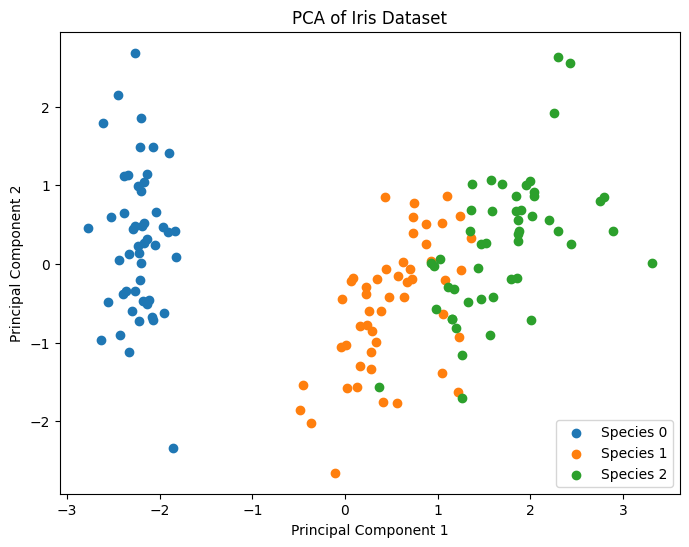

In [207]:
# Add the target column to the PCA DataFrame
pca_df['Target'] = target

# Visualize the first two principal components
plt.figure(figsize=(8, 6))
for species in range(3):
    plt.scatter(
        pca_df.loc[pca_df['Target'] == species, 'PC1'],
        pca_df.loc[pca_df['Target'] == species, 'PC2'],
        label=f'Species {species}'
    )

plt.title('PCA of Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


In [208]:
X_train, X_test, y_train, y_test = train_test_split(pca_df.iloc[:, :-1], pca_df['Target'].values, test_size = 0.3, random_state=20, stratify=pca_df['Target'].values)

In [209]:
X_train

,PC1,PC2,PC3,PC4
42,-2.553638,-0.479101,0.305766,0.066601
16,-2.207588,1.483609,-0.005344,-0.188817
49,-2.203833,0.009216,-0.153029,-0.049372
94,0.288586,-0.855730,0.130890,0.107402
41,-1.858122,-2.337415,-0.204234,-0.289864
...,...,...,...,...
99,0.256731,-0.598852,0.091879,0.058622
30,-2.140122,-0.504541,-0.075008,0.048189
2,-2.364229,-0.341908,0.044201,-0.028377
130,2.435954,0.259284,-0.727816,0.017923


Optimal k: 3


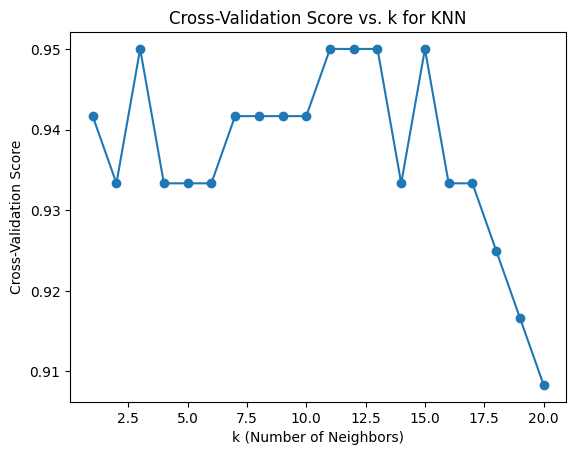

Test Accuracy with k=3: 1.0


In [210]:
# Extract features and target
X = pca_df.drop('Target', axis=1)
y = pca_df['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a range of k values to try
k_values = list(range(1, 21))

# Create an empty list to store cross-validation scores for each k
cv_scores = []

# Perform k-fold cross-validation for each k
for k in k_values:
    # Create a pipeline with PCA and KNN
    model = KNeighborsClassifier(n_neighbors=k)

    # Perform cross-validation
    scores = cross_val_score(model, X_train, y_train, cv=5)  # You can adjust the number of folds (cv) as needed

    # Average cross-validation scores for this k
    cv_scores.append(np.mean(scores))

# Find the optimal k with the highest cross-validation score
optimal_k = k_values[np.argmax(cv_scores)]
print(f'Optimal k: {optimal_k}')

# Plot the cross-validation scores for different k values
plt.plot(k_values, cv_scores, marker='o')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Cross-Validation Score')
plt.title('Cross-Validation Score vs. k for KNN')
plt.show()

# Train the final model with the optimal k using the entire training set
final_model = KNeighborsClassifier(n_neighbors=optimal_k)
final_model.fit(X_train, y_train)

# Evaluate the model on the test set
test_accuracy = final_model.score(X_test, y_test)
print(f'Test Accuracy with k={optimal_k}: {test_accuracy}')


# Your Turn

In [32]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
dermatology = fetch_ucirepo(id=33) 
  
# data (as pandas dataframes) 
X = dermatology.data.features 
y = dermatology.data.targets['class']


# EDA

In [33]:
X.shape

(366, 34)

In [34]:
# TODO: Let's see the head of X
X.head()

,erythema,scaling,definite-borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral-mucosal involvement,knee elbow involvement,scalp involvement,...,focal hypergranulosis,disappearance of the granular layer,vacuolisation and damage of the basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear infiltrate,band-like infiltrate,age
0,2,2,0,3,0,0,0,0,1,0,...,0,0,0,3,0,0,0,1,0,55.0
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0,8.0
2,2,1,2,3,1,3,0,3,0,0,...,2,0,2,3,2,0,0,2,3,26.0
3,2,2,2,0,0,0,0,0,3,2,...,0,3,0,0,0,0,0,3,0,40.0
4,2,3,2,2,2,2,0,2,0,0,...,2,2,3,2,3,0,0,2,3,45.0


In [35]:
# Do any of the columns have missing values?
X.isnull().sum()

erythema                                       0
scaling                                        0
definite-borders                               0
itching                                        0
koebner phenomenon                             0
polygonal papules                              0
follicular papules                             0
oral-mucosal involvement                       0
knee elbow involvement                         0
scalp involvement                              0
family history                                 0
melanin incontinence                           0
eosinophils in the infiltrate                  0
pnl infiltrate                                 0
fibrosis of the papillary dermis               0
exocytosis                                     0
acanthosis                                     0
hyperkeratosis                                 0
parakeratosis                                  0
clubbing of the rete ridges                    0
elongation of the re

In [36]:
# TODO: Any missing values in target vector, y?
y.isnull().sum()

0

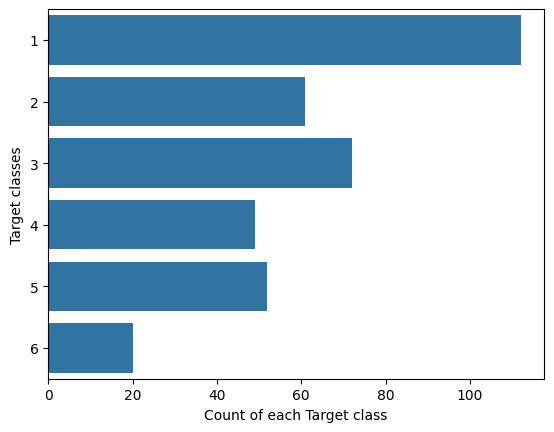

In [37]:
# Visualize distribution of target labels using a count plot
sns.countplot(y=y ,data=X)
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()


In [38]:
# TODO: Reflection: Is this a balanced dataset?
# No, the dataset is not balanced
# The dataset is imbalanced because the number of samples in each class is not equal
# For example, class 1 has 5 times the sample of class 6

# Preprocessing

In [39]:
# TODO: Split data into train, test with 20% holdout
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=_RANDOM_STATE, stratify=y.values)



In [40]:
# Copy X_train to a new var X_eda
X_eda = X_train.copy(deep=True)

In [41]:
# TODO: instantiate a SimpleImputer and fit_transform X_eda
# NOTE: Use set_output API to maintain dataframe type
# TODO: print out X_eda.isna().any().any()
from sklearn.impute import SimpleImputer

# Instantiate the SimpleImputer
imputer = SimpleImputer(strategy='mean')

# Fit and transform the data
X_eda = imputer.fit_transform(X_eda)

# Convert the NumPy array back to a DataFrame
X_eda = pd.DataFrame(X_eda, columns=X.columns)

# Check for missing values
print(X_eda.isnull().any().any())

False


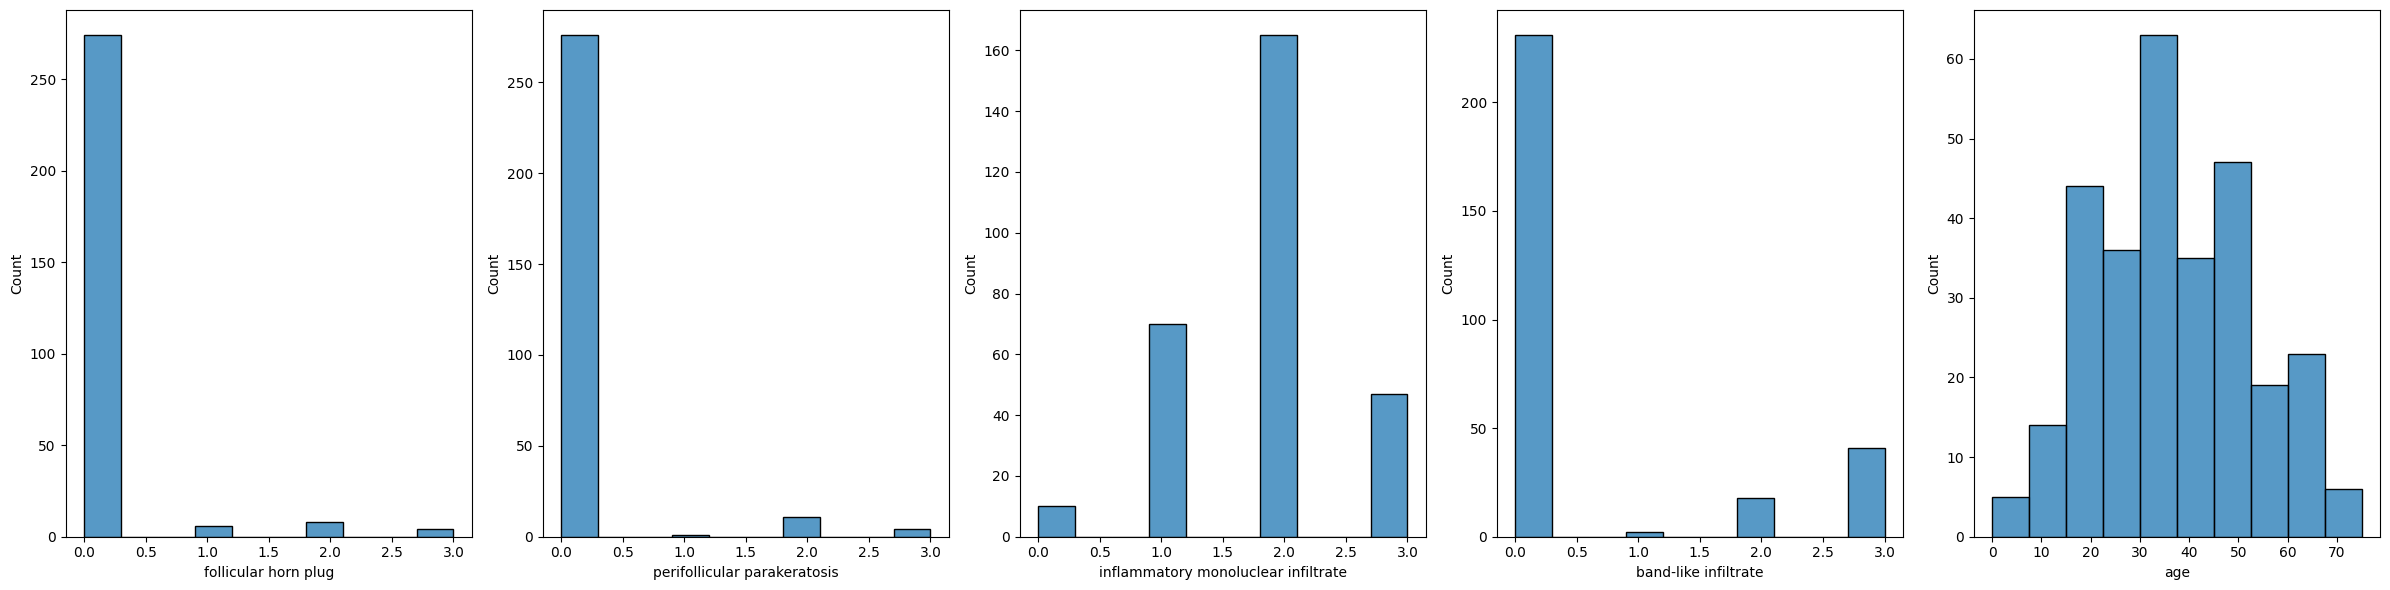

In [42]:
# TODO: For last 5 features, plot a histplot to visualize feature distribution

def plot_last_5_features(X: pd.DataFrame) -> None:
    """Plots subplot histograms of last five features of X on a single figure

    Args:
        X (pd.DataFrame): Dataframe to plot
    """
    fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(24,6))
    # TODO: You complete the function

    # Get the last 5 features
    last_5_features = X.columns[-5:]

    # Plot a histogram for each feature
    for i, feature in enumerate(last_5_features):
        sns.histplot(X[feature], ax=axes[i])
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Count')

    plt.tight_layout()
    plt.show()

plot_last_5_features(X_eda)

In [43]:
# TODO: Scale all features in X_eda using StandardScaler
from sklearn.preprocessing import StandardScaler

# Instantiate the StandardScaler
scaler = StandardScaler().set_output(transform="pandas")

# Fit and transform the data
X_eda = scaler.fit_transform(X_eda)

X_eda


,erythema,scaling,definite-borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral-mucosal involvement,knee elbow involvement,scalp involvement,...,focal hypergranulosis,disappearance of the granular layer,vacuolisation and damage of the basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear infiltrate,band-like infiltrate,age
0,-0.074662,1.682317,0.472404,1.430488,2.640559,1.648973,-0.291486,1.924817,-0.628391,-0.574871,...,3.035442,1.798415,1.662623,0.021215,1.624721,-0.237745,-0.233713,0.205006,1.315245,-0.624711
1,-0.074662,0.282783,-0.622374,1.430488,-0.692481,-0.462870,-0.291486,-0.451701,-0.628391,-0.574871,...,-0.467914,-0.525201,-0.480803,-0.863767,-0.469842,-0.237745,-0.233713,0.205006,-0.500601,0.985312
2,-0.074662,0.282783,0.472404,-1.230037,1.529546,-0.462870,-0.291486,-0.451701,-0.628391,-0.574871,...,-0.467914,-0.525201,-0.480803,0.906198,-0.469842,-0.237745,-0.233713,-1.187128,-0.500601,-0.431509
3,-0.074662,0.282783,-0.622374,-1.230037,0.418532,-0.462870,-0.291486,-0.451701,-0.628391,-0.574871,...,-0.467914,0.636607,-0.480803,1.791181,-0.469842,-0.237745,-0.233713,0.205006,-0.500601,1.629321
4,-1.528082,-1.116752,-0.622374,-1.230037,0.418532,-0.462870,-0.291486,-0.451701,-0.628391,-0.574871,...,-0.467914,-0.525201,-0.480803,0.906198,-0.469842,-0.237745,-0.233713,1.597141,-0.500601,-0.946716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,-0.074662,0.282783,-0.622374,-1.230037,-0.692481,-0.462870,-0.291486,-0.451701,0.408277,-0.574871,...,-0.467914,-0.525201,-0.480803,-0.863767,-0.469842,-0.237745,-0.233713,-2.579263,-0.500601,0.000000
288,1.378758,0.282783,0.472404,0.543646,1.529546,-0.462870,-0.291486,-0.451701,-0.628391,-0.574871,...,-0.467914,-0.525201,-0.480803,-0.863767,-0.469842,-0.237745,-0.233713,0.205006,-0.500601,0.212501
289,-0.074662,0.282783,-1.717151,0.543646,0.418532,-0.462870,-0.291486,-0.451701,-0.628391,-0.574871,...,-0.467914,-0.525201,-0.480803,1.791181,-0.469842,-0.237745,-0.233713,1.597141,-0.500601,2.144528
290,-0.074662,0.282783,-0.622374,-1.230037,-0.692481,-0.462870,4.919570,-0.451701,1.444944,-0.574871,...,-0.467914,-0.525201,-0.480803,0.906198,-0.469842,5.887680,5.615784,0.205006,-0.500601,-1.912730


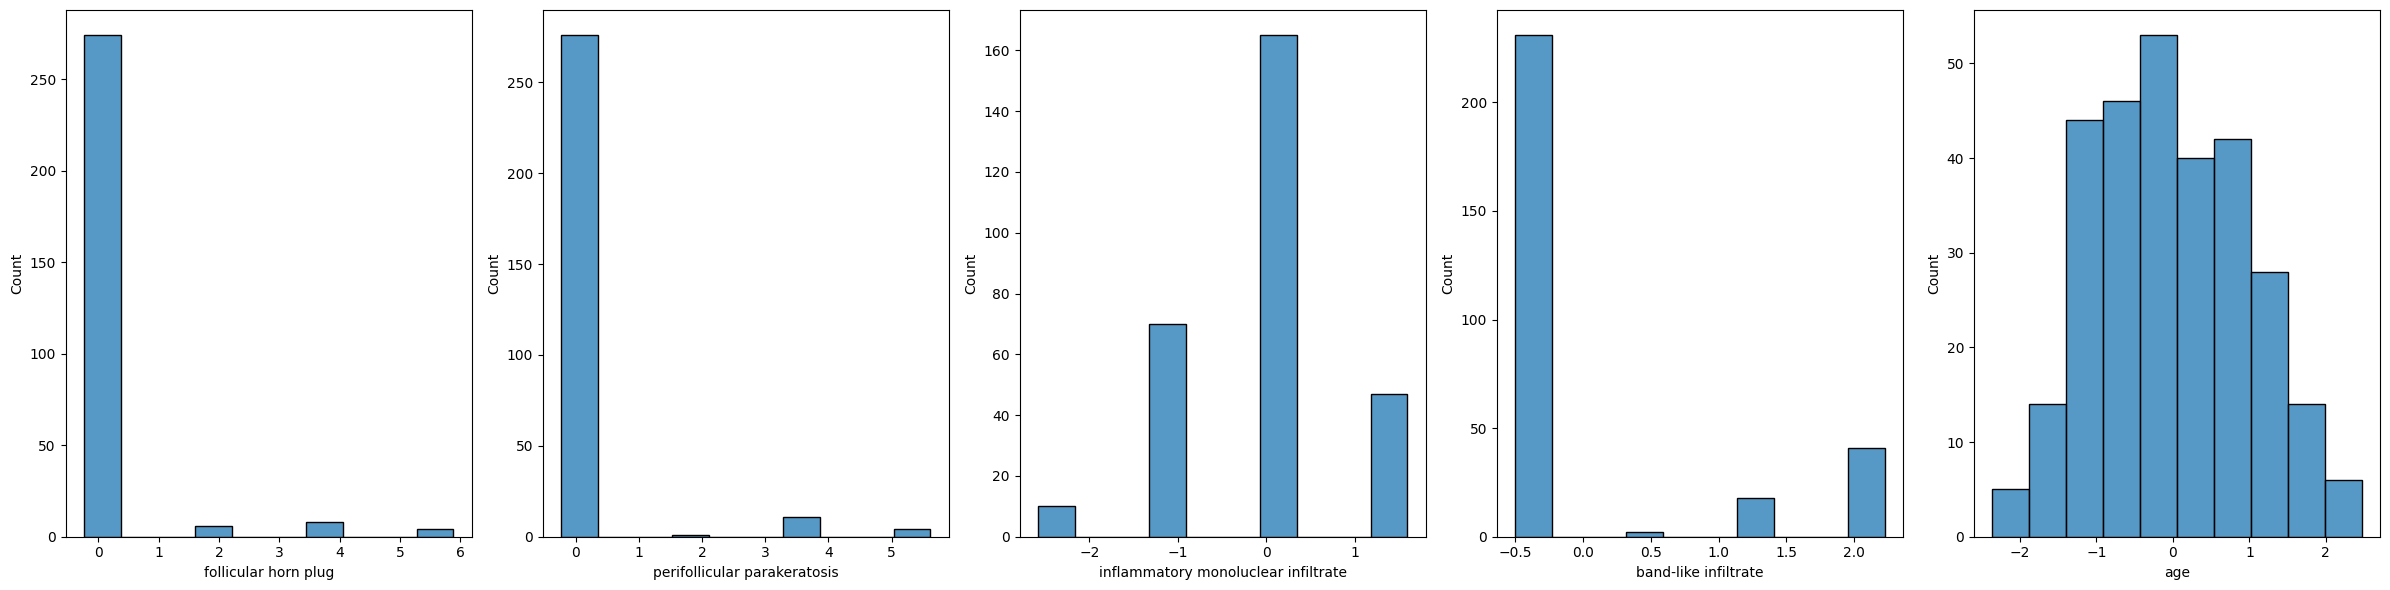

In [44]:
# TODO: Call above histogram function again to see what happened to our vars:

plot_last_5_features(X_eda)

# Dimensionality Reduction

In [45]:
# Let's reduce the dimensionality of our dataset! 
# TODO: Instantiate a PCA with the number of components required to explain 90% of the variance in the X_eda
# NOTE: Use set_output API to ensure X_eda is returned as dataframe instead of np.array
# TODO: Call fit_transform on X_eda and 

# Instantiate the PCA model
pca = PCA(n_components=0.9).set_output(transform="pandas")

# Fit and transform the data
X_eda = pca.fit_transform(X_eda)

X_eda

,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13,pca14,pca15,pca16
0,-5.116842,2.823672,0.560880,-0.442214,0.874872,-0.459269,-1.204446,-0.600446,-1.057006,-0.283611,0.683772,0.997963,-1.099045,-1.273541,-1.504365,0.837570,0.456132
1,0.458282,-1.698254,-2.220641,2.785711,-1.418984,0.202457,-0.792861,0.308822,-0.141090,1.826096,-0.027603,0.035103,-1.205935,-0.412382,-0.101483,0.328835,0.820150
2,-0.393232,-1.358782,-0.222525,-1.254535,1.008457,0.006720,-1.361536,0.454735,-1.095130,-1.146766,-0.606341,0.079253,0.154433,0.794409,-0.062799,-1.509135,-0.503937
3,-0.626148,-1.889888,-1.063978,-1.468815,0.811749,-1.638860,-0.810084,0.185239,0.825219,-0.625797,-1.158139,1.270550,-0.903849,0.152358,0.198634,0.091929,0.197765
4,-0.671659,-2.371323,-0.638105,0.172741,0.760716,-2.180224,-0.052764,-1.190203,-0.080178,-0.894333,-0.436343,0.339463,1.327630,-0.345268,-0.061835,-0.633514,0.386476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,3.009170,0.250202,0.102781,-0.174129,0.713259,1.695071,-0.101338,2.399346,0.667026,-0.471791,1.435688,0.955008,1.490142,0.282037,1.390257,-0.367473,0.177895
288,1.519171,0.712167,-0.878218,-0.011594,0.496634,0.216176,-0.170123,-0.376871,-1.417503,1.504850,-0.436759,0.265394,-0.810156,-0.813000,0.696787,-1.176998,-0.366769
289,-0.926062,-2.062187,-1.239572,-1.652602,1.893481,-0.863695,0.407749,-1.045937,0.995820,1.299440,-0.040171,-0.711699,-1.429114,2.471238,0.039974,0.159541,0.489454
290,1.091055,-3.956017,9.445109,0.676283,-0.869016,0.066181,-0.062876,-0.305007,1.114732,0.362754,0.037113,0.891469,-0.503313,0.984737,-0.207720,-0.466629,-0.069801


In [46]:
# TODO: Reflect: How many features do we now have? Did we reduce the dimensionality of the dataset?
# We now have 17 features
# Yes, we reduced the dimensionality of the dataset from 34 to 17 features

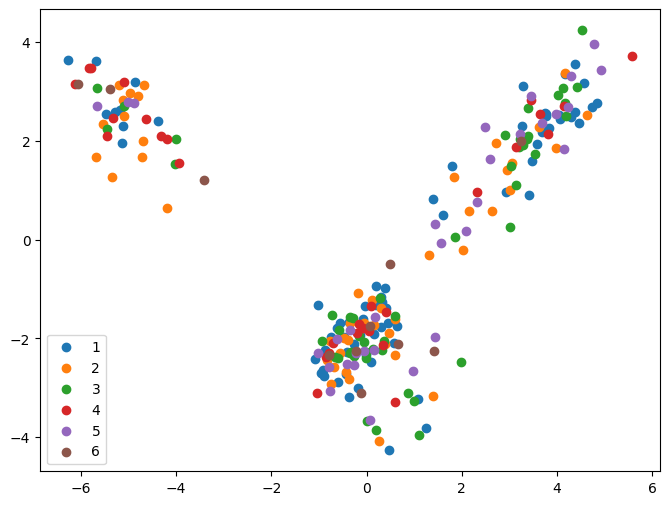

In [47]:
# TODO: Visualize first two PCA components of X_eda on a scatter plot independently for each unique label found in y_train
unique_label = np.unique(y_train)
X_eda['Target'] = y_train

plt.figure(figsize=(8, 6))
for label in unique_label:
    plt.scatter(
        X_eda.loc[X_eda['Target'] == label, 'pca0'],
        X_eda.loc[X_eda['Target'] == label, 'pca1'],
        label=f'{label}'
    )

plt.legend()
plt.show()

# Modelling

In [48]:
# Instantiate a random forest classifier with default values other than random_state set to _RANDOM_STATE
from sklearn.ensemble import RandomForestClassifier


rf = RandomForestClassifier(random_state=_RANDOM_STATE)

In [49]:
# Create a pipeline with our SimpleImputer, StandardScaler, PCA, and rf
si = imputer
ss = scaler
from sklearn.pipeline import make_pipeline
steps = [si, ss, pca, rf]
pipe = make_pipeline(*steps)

Optimal number of components: 6


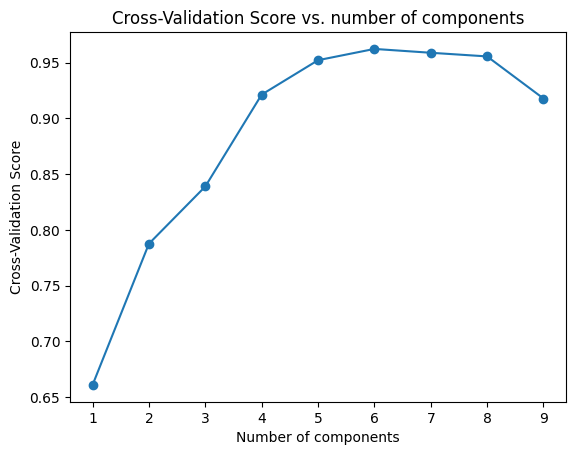

In [50]:
# TODO: Let's test our pipeline using different numbers of principal components similar to above
# NOTE: Recall that you can slice dataframes as follow: df.iloc[:, :i] will select all rows and all columns up to column number i

# Define a range of pca components to try
components = list(range(1, 10))
cv_scores = []

# Perform k-fold cross-validation for each number of components
for c in components:
    # Perform cross-validation
    scores = cross_val_score(pipe, X_eda.iloc[:, :c], y_train, cv=5)  # You can adjust the number of folds (cv) as needed
    # Average cross-validation scores for this number of components
    cv_scores.append(np.mean(scores))

# Find the optimal k with the highest cross-validation score
optimal_comp = components[np.argmax(cv_scores)]
print(f'Optimal number of components: {optimal_comp}')

# Plot the cross-validation scores for different k values
plt.plot(components, cv_scores, marker='o')
plt.xlabel('Number of components')
plt.ylabel('Cross-Validation Score')
plt.title('Cross-Validation Score vs. number of components')
plt.show()


In [51]:
# Train the final model with the optimal number of components using the entire training set
pipe.fit(X_train.iloc[:, :optimal_comp], y_train)

# TODO: Evaluate the model on the test set
test_accuracy = pipe.score(X_test.iloc[:, :optimal_comp], y_test)

print(f'Test Accuracy with num comps == {optimal_comp}: {test_accuracy}')

Test Accuracy with num comps == 6: 0.7027027027027027
